In [2]:
%pip install tensorflow keras wandb

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nojus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras import models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from keras import layers
import wandb
from wandb.keras import WandbMetricsLogger
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error




Electrodes:Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10


In [4]:

electrodes_list = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8','FC5','FC1','FC2','FC6','T7','C3','Cz','C4','T8','TP9','CP5','CP1','CP2','CP6','TP10','P7','P3','Pz','P4','P8','PO9','O1','Oz','O2','PO10']
electrodes = {'Fp1':[],'Fp2':[],'F7':[],'F3':[],'Fz':[],'F4':[],'F8':[],'FC5':[],'FC1':[],'FC2':[],'FC6':[],'T7':[],'C3':[],'Cz':[],'C4':[],'T8':[],'TP9':[],'CP5':[],'CP1':[],'CP2':[],'CP6':[],'TP10':[],'P7':[],'P3':[],'Pz':[],'P4':[],'P8':[],'PO9':[],'O1':[],'Oz':[],'O2':[],'PO10':[]}
averages =  {'Fp1':[],'Fp2':[],'F7':[],'F3':[],'Fz':[],'F4':[],'F8':[],'FC5':[],'FC1':[],'FC2':[],'FC6':[],'T7':[],'C3':[],'Cz':[],'C4':[],'T8':[],'TP9':[],'CP5':[],'CP1':[],'CP2':[],'CP6':[],'TP10':[],'P7':[],'P3':[],'Pz':[],'P4':[],'P8':[],'PO9':[],'O1':[],'Oz':[],'O2':[],'PO10':[]}
electrodes_copy = {'Fp1':[],'Fp2':[],'F7':[],'F3':[],'Fz':[],'F4':[],'F8':[],'FC5':[],'FC1':[],'FC2':[],'FC6':[],'T7':[],'C3':[],'Cz':[],'C4':[],'T8':[],'TP9':[],'CP5':[],'CP1':[],'CP2':[],'CP6':[],'TP10':[],'P7':[],'P3':[],'Pz':[],'P4':[],'P8':[],'PO9':[],'O1':[],'Oz':[],'O2':[],'PO10':[]}
averages_copy =  {'Fp1':[],'Fp2':[],'F7':[],'F3':[],'Fz':[],'F4':[],'F8':[],'FC5':[],'FC1':[],'FC2':[],'FC6':[],'T7':[],'C3':[],'Cz':[],'C4':[],'T8':[],'TP9':[],'CP5':[],'CP1':[],'CP2':[],'CP6':[],'TP10':[],'P7':[],'P3':[],'Pz':[],'P4':[],'P8':[],'PO9':[],'O1':[],'Oz':[],'O2':[],'PO10':[]}


In [8]:
#load data
spr_data = pd.read_csv('dbc_spr_data_target.csv')
data = pd.read_csv("dbc_data.csv")
    

In [9]:
data

,ItemNum,Condition,Subject,Timestamp,TrialNum,Fp1,Fp2,F7,F3,Fz,...,P8,PO9,O1,Oz,O2,PO10,VEOG,HEOG,Assoc,Plaus
0,1,control,5,-200,197,-1.20971,2.52400,-5.24529,-3.35825,-5.09060,...,2.29405,0.64024,-4.89769,-6.64080,-3.25357,-0.07328,0.71351,1.91076,6.8,6.416667
1,1,control,5,-198,197,-0.83101,2.92082,-5.41510,-3.22667,-4.61091,...,2.45947,0.78223,-5.05034,-6.61679,-2.91444,0.10294,0.67929,2.78725,6.8,6.416667
2,1,control,5,-196,197,-0.11259,3.49500,-4.92985,-2.57258,-3.57396,...,2.82271,1.14153,-4.55636,-5.89756,-2.12281,0.54867,0.59286,3.42723,6.8,6.416667
3,1,control,5,-194,197,0.89073,4.20807,-3.93422,-1.44027,-2.04021,...,3.32898,1.65022,-3.49408,-4.58794,-0.94843,1.23226,0.41795,3.69663,6.8,6.416667
4,1,control,5,-192,197,2.05291,4.89957,-2.72258,0.02966,-0.17849,...,3.87386,2.19716,-2.01769,-2.85254,0.51508,2.09137,0.10579,3.52454,6.8,6.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293595,90,script-unrelated,21,1190,1588,0.73032,-0.50984,-1.14073,-10.83687,-13.13879,...,0.50029,-16.89443,-1.90192,1.55856,2.53320,12.71346,-29.60788,13.07202,3.9,2.500000
1293596,90,script-unrelated,21,1192,1588,2.53046,0.63507,0.42298,-9.91345,-13.02235,...,-2.11160,-14.96593,-2.05659,1.22516,1.16928,14.58646,-29.55238,11.50487,3.9,2.500000
1293597,90,script-unrelated,21,1194,1588,4.39755,1.99197,1.90782,-8.98467,-12.78465,...,-4.65342,-13.06380,-2.22250,0.89966,-0.03291,16.60000,-29.66380,9.95807,3.9,2.500000
1293598,90,script-unrelated,21,1196,1588,6.28774,3.58098,3.27531,-8.00595,-12.30128,...,-6.98318,-11.33832,-2.37400,0.60154,-1.09776,18.68834,-30.02666,8.60108,3.9,2.500000


In [10]:
spr_data.head(5)

,ItemNum,Condition,Subject,RT,Assoc,Plaus,Accuracy
0,1,control,19,466,6.8,6.416667,1
1,1,control,10,328,6.8,6.416667,1
2,1,control,13,701,6.8,6.416667,1
3,1,control,16,147,6.8,6.416667,1
4,1,control,7,557,6.8,6.416667,1


In [32]:
#copy of EEG data
data_copy = data.loc[:]
data_copy

,ItemNum,Condition,Subject,Timestamp,TrialNum,Fp1,Fp2,F7,F3,Fz,...,P8,PO9,O1,Oz,O2,PO10,VEOG,HEOG,Assoc,Plaus
0,1,control,5,-200,197,-1.20971,2.52400,-5.24529,-3.35825,-5.09060,...,2.29405,0.64024,-4.89769,-6.64080,-3.25357,-0.07328,0.71351,1.91076,6.8,6.416667
1,1,control,5,-198,197,-0.83101,2.92082,-5.41510,-3.22667,-4.61091,...,2.45947,0.78223,-5.05034,-6.61679,-2.91444,0.10294,0.67929,2.78725,6.8,6.416667
2,1,control,5,-196,197,-0.11259,3.49500,-4.92985,-2.57258,-3.57396,...,2.82271,1.14153,-4.55636,-5.89756,-2.12281,0.54867,0.59286,3.42723,6.8,6.416667
3,1,control,5,-194,197,0.89073,4.20807,-3.93422,-1.44027,-2.04021,...,3.32898,1.65022,-3.49408,-4.58794,-0.94843,1.23226,0.41795,3.69663,6.8,6.416667
4,1,control,5,-192,197,2.05291,4.89957,-2.72258,0.02966,-0.17849,...,3.87386,2.19716,-2.01769,-2.85254,0.51508,2.09137,0.10579,3.52454,6.8,6.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293595,90,script-unrelated,21,1190,1588,0.73032,-0.50984,-1.14073,-10.83687,-13.13879,...,0.50029,-16.89443,-1.90192,1.55856,2.53320,12.71346,-29.60788,13.07202,3.9,2.500000
1293596,90,script-unrelated,21,1192,1588,2.53046,0.63507,0.42298,-9.91345,-13.02235,...,-2.11160,-14.96593,-2.05659,1.22516,1.16928,14.58646,-29.55238,11.50487,3.9,2.500000
1293597,90,script-unrelated,21,1194,1588,4.39755,1.99197,1.90782,-8.98467,-12.78465,...,-4.65342,-13.06380,-2.22250,0.89966,-0.03291,16.60000,-29.66380,9.95807,3.9,2.500000
1293598,90,script-unrelated,21,1196,1588,6.28774,3.58098,3.27531,-8.00595,-12.30128,...,-6.98318,-11.33832,-2.37400,0.60154,-1.09776,18.68834,-30.02666,8.60108,3.9,2.500000


In [12]:
#index by by item number, subject and condition so that its easy to pull one EEG experiment later
data_copy =data_copy.set_index(['ItemNum',  'Condition', 'Subject'])

In [13]:
#drop columns that are not necessary
data_copy = data_copy.drop(['TrialNum', 'HEOG', 'VEOG', 'Assoc', 'Plaus'], axis = 1)

In [14]:
data_copy

Timestamp      Fp1      Fp2       F7  \
ItemNum Condition        Subject                                         
1       control          5             -200 -1.20971  2.52400 -5.24529   
                         5             -198 -0.83101  2.92082 -5.41510   
                         5             -196 -0.11259  3.49500 -4.92985   
                         5             -194  0.89073  4.20807 -3.93422   
                         5             -192  2.05291  4.89957 -2.72258   
...                                     ...      ...      ...      ...   
90      script-unrelated 21            1190  0.73032 -0.50984 -1.14073   
                         21            1192  2.53046  0.63507  0.42298   
                         21            1194  4.39755  1.99197  1.90782   
                         21            1196  6.28774  3.58098  3.27531   
                         21            1198  8.17561  5.38782  4.52047   

                                        F3        Fz       F4       F8  \
ItemNum Condition        Subject                                         
1       control          5        -3.35825  -5.09060 -5.03072  0.75808   
                         5        -3.22667  -4.61091 -4.05609  0.93607   
                         5        -2.57258  -3.57396 -2.35894  1.21045   
                         5        -1.44027  -2.04021 -0.03051  1.55044   
                         5         0.02966  -0.17849  2.65758  1.95099   
...                                    ...       ...      ...      ...   
90      script-unrelated 21      -10.83687 -13.13879 -5.03900  1.34555   
                         21       -9.91345 -13.02235 -4.77273  1.19406   
                         21       -8.98467 -12.78465 -4.23679  1.34813   
                         21       -8.00595 -12.30128 -3.37068  1.87702   
                         21       -6.93121 -11.47295 -2.14472  2.79418   

                                      FC5      FC1  ...        P7       P3  \
ItemNum Condition        Subject                    ...                      
1       control          5       -5.14854 -4.76760  ...  -3.01284 -2.09255   
                         5       -4.88549 -4.65950  ...  -3.43947 -2.32634   
                         5       -4.19749 -3.98448  ...  -3.37743 -2.03314   
                         5       -3.14670 -2.79818  ...  -2.86173 -1.27626   
                         5       -1.85683 -1.26480  ...  -2.01307 -0.17923   
...                                   ...      ...  ...       ...      ...   
90      script-unrelated 21      -5.72982 -7.95168  ... -11.74718 -1.86121   
                         21      -4.65782 -7.13739  ... -11.66094 -1.13657   
                         21      -3.63225 -6.36322  ... -11.49469 -0.47284   
                         21      -2.62036 -5.56882  ... -11.22251  0.10544   
                         21      -1.57638 -4.69880  ... -10.78656  0.62664   

                                       Pz       P4       P8       PO9  \
ItemNum Condition        Subject                                        
1       control          5       -0.28447  0.69816  2.29405   0.64024   
                         5       -0.14533  1.02523  2.45947   0.78223   
                         5        0.51351  1.76842  2.82271   1.14153   
                         5        1.62937  2.85362  3.32898   1.65022   
                         5        3.05988  4.12485  3.87386   2.19716   
...                                   ...      ...      ...       ...   
90      script-unrelated 21      -0.62735 -2.35254  0.50029 -16.89443   
                         21      -1.00181 -3.97723 -2.11160 -14.96593   
                         21      -1.33264 -5.42567 -4.65342 -13.06380   
                         21      -1.59978 -6.60070 -6.98318 -11.33832   
                         21      -1.77155 -7.44158 -8.96632  -9.88049   

                                       O1       Oz       O2      PO10  
ItemNum Condition        Subject                                       

In [15]:
#testing accesing an experiment from the dataframe
test = data_copy.loc[(1, 'control', 5)]
test


Timestamp       Fp1      Fp2       F7        F3  \
ItemNum Condition Subject                                                    
1       control   5             -200  -1.20971  2.52400 -5.24529  -3.35825   
                  5             -198  -0.83101  2.92082 -5.41510  -3.22667   
                  5             -196  -0.11259  3.49500 -4.92985  -2.57258   
                  5             -194   0.89073  4.20807 -3.93422  -1.44027   
                  5             -192   2.05291  4.89957 -2.72258   0.02966   
...                              ...       ...      ...      ...       ...   
                  5             1190 -13.30694 -6.29164 -6.31052 -10.81505   
                  5             1192 -11.90899 -4.91423 -5.79533 -11.12276   
                  5             1194 -11.35194 -4.31777 -5.72996 -11.56740   
                  5             1196 -11.68057 -4.45219 -6.13633 -12.12251   
                  5             1198 -12.73966 -5.03117 -6.85307 -12.70885   

                                Fz       F4        F8      FC5      FC1  ...  \
ItemNum Condition Subject                                                ...   
1       control   5       -5.09060 -5.03072   0.75808 -5.14854 -4.76760  ...   
                  5       -4.61091 -4.05609   0.93607 -4.88549 -4.65950  ...   
                  5       -3.57396 -2.35894   1.21045 -4.19749 -3.98448  ...   
                  5       -2.04021 -0.03051   1.55044 -3.14670 -2.79818  ...   
                  5       -0.17849  2.65758   1.95099 -1.85683 -1.26480  ...   
...                            ...      ...       ...      ...      ...  ...   
                  5       -5.86176 -9.21278 -14.90361 -4.98216  7.53338  ...   
                  5       -5.53842 -8.96457 -13.26767 -5.00517  7.61398  ...   
                  5       -5.45285 -9.06355 -11.96487 -5.22972  7.58312  ...   
                  5       -5.60692 -9.41442 -11.08642 -5.64043  7.45572  ...   
                  5       -5.91319 -9.88619 -10.64151 -6.15370  7.30669  ...   

                                P7        P3        Pz        P4       P8  \
ItemNum Condition Subject                                                   
1       control   5       -3.01284  -2.09255  -0.28447   0.69816  2.29405   
                  5       -3.43947  -2.32634  -0.14533   1.02523  2.45947   
                  5       -3.37743  -2.03314   0.51351   1.76842  2.82271   
                  5       -2.86173  -1.27626   1.62937   2.85362  3.32898   
                  5       -2.01307  -0.17923   3.05988   4.12485  3.87386   
...                            ...       ...       ...       ...      ...   
                  5        6.16513  18.56332  10.83941  15.37572 -9.63348   
                  5        5.67340  18.28190  10.77579  15.75905 -9.12688   
                  5        5.13027  17.90837  10.61339  16.06617 -8.68536   
                  5        4.60223  17.47593  10.36430  16.27186 -8.31606   
                  5        4.18501  17.08104  10.10966  16.43237 -7.93379   

                               PO9       O1       Oz       O2      PO10  
ItemNum Condition Subject                                                
1       control   5        0.64024 -4.89769 -6.64080 -3.25357  -0.07328  
                  5        0.78223 -5.05034 -6.61679 -2.91444   0.10294  
                  5        1.14153 -4.55636 -5.89756 -2.12281   0.54867  
                  5        1.65022 -3.49408 -4.58794 -0.94843   1.23226  
                  5        2.19716 -2.01769 -2.85254  0.51508   2.09137  
...                            ...      ...      ...      ...       ...  
                  5       -7.26146 -0.23115  9.30324  0.16624 -11.49276  
                  5       -6.88687 -0.75502  8.95166  0.24435  -9.63563  
                  5       -6.91096 -1.38896  8.43272  0.08944  -8.87305  
                  5       -7.30122 -2.05450  7.84270 -0.20200  -9.16813  
                  5       -7.91904 -2.61992  7.33267 -0.44492 -10.32064  

[700 r

In [16]:
#list of unique experiments 
uniques = list(dict.fromkeys(data_copy.index.values.tolist()))
uniques

[(1, 'control', 5),
 (1, 'control', 8),
 (1, 'control', 14),
 (1, 'control', 17),
 (1, 'control', 20),
 (1, 'control', 23),
 (1, 'control', 26),
 (1, 'script-related', 2),
 (1, 'script-related', 6),
 (1, 'script-related', 9),
 (1, 'script-related', 12),
 (1, 'script-related', 15),
 (1, 'script-related', 18),
 (1, 'script-related', 21),
 (1, 'script-unrelated', 3),
 (1, 'script-unrelated', 7),
 (1, 'script-unrelated', 10),
 (1, 'script-unrelated', 13),
 (1, 'script-unrelated', 16),
 (1, 'script-unrelated', 19),
 (1, 'script-unrelated', 25),
 (2, 'control', 2),
 (2, 'control', 6),
 (2, 'control', 9),
 (2, 'control', 12),
 (2, 'control', 15),
 (2, 'control', 18),
 (2, 'control', 21),
 (2, 'script-related', 3),
 (2, 'script-related', 7),
 (2, 'script-related', 10),
 (2, 'script-related', 13),
 (2, 'script-related', 16),
 (2, 'script-related', 19),
 (2, 'script-related', 25),
 (2, 'script-unrelated', 5),
 (2, 'script-unrelated', 8),
 (2, 'script-unrelated', 14),
 (2, 'script-unrelated', 17)

In [17]:
#dictionary of all experiments
#the format of the key is a tuple of the form (ItemNum, Condition, Subject)
subject_data = dict()
for item in uniques:
    subject_data[item] = data_copy.loc[item]
    

In [18]:
#separate dictionary of averages of all electrodes per experiment instance
#same format
subject_data_avg = dict()
for item in subject_data:
    subject_data_avg[item] = subject_data[item].mean()
    subject_data_avg[item] = subject_data_avg[item].drop('Timestamp')

In [19]:
subject_data_avg[(1,'control', 5)]

Fp1     -3.283027
Fp2      1.794766
F7       0.469282
F3      -0.386121
Fz       3.035667
F4       0.111679
F8      -1.333367
FC5      1.598490
FC1     10.411323
FC2     12.241962
FC6     -5.330903
T7      -4.594679
C3       6.767656
Cz       8.606985
C4      20.344406
T8      -3.905636
TP9     -6.237751
CP5      4.255055
CP1     12.820719
CP2     10.509449
CP6      5.118414
TP10    -3.030997
P7       3.468283
P3      12.183570
Pz       9.895105
P4      13.754308
P8       1.564951
PO9     -3.275927
O1       1.531946
Oz       6.417109
O2       3.606478
PO10    -4.752072
dtype: float64

In [20]:
#same thing for SPR data
spr_data_copy =spr_data.set_index(['ItemNum', 'Condition'])
spr_data_copy = spr_data_copy.drop(['Assoc', 'Plaus', 'Accuracy', 'Subject'], axis = 1)

spr_data_copy.loc[(1, 'control')]

C:\Users\nojus\AppData\Local\Temp\ipykernel_18624\509559944.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  spr_data_copy.loc[(1, 'control')]


RT
ItemNum Condition     
1       control    466
        control    328
        control    701
        control    147
        control    557
        control    258
        control    755
        control    382
        control    468
        control    253
        control    441

In [21]:
#indices of SPR data
uniques1 = list(dict.fromkeys(spr_data_copy.index.values.tolist()))
uniques1

[(1, 'control'),
 (1, 'script-related'),
 (1, 'script-unrelated'),
 (10, 'control'),
 (10, 'script-related'),
 (10, 'script-unrelated'),
 (11, 'control'),
 (11, 'script-related'),
 (11, 'script-unrelated'),
 (12, 'control'),
 (12, 'script-related'),
 (12, 'script-unrelated'),
 (13, 'control'),
 (13, 'script-related'),
 (13, 'script-unrelated'),
 (14, 'control'),
 (14, 'script-related'),
 (14, 'script-unrelated'),
 (15, 'control'),
 (15, 'script-related'),
 (15, 'script-unrelated'),
 (16, 'control'),
 (16, 'script-related'),
 (16, 'script-unrelated'),
 (17, 'control'),
 (17, 'script-related'),
 (17, 'script-unrelated'),
 (18, 'control'),
 (18, 'script-related'),
 (18, 'script-unrelated'),
 (19, 'control'),
 (19, 'script-related'),
 (19, 'script-unrelated'),
 (2, 'control'),
 (2, 'script-related'),
 (2, 'script-unrelated'),
 (20, 'control'),
 (20, 'script-related'),
 (20, 'script-unrelated'),
 (21, 'control'),
 (21, 'script-related'),
 (21, 'script-unrelated'),
 (22, 'control'),
 (22, 's

In [22]:
#average reading time per item and condition
spr_avgs = []
for item in uniques1:
    spr_avgs.append(spr_data_copy.loc[item].mean())
spr_avgs

C:\Users\nojus\AppData\Local\Temp\ipykernel_18624\311545692.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  spr_avgs.append(spr_data_copy.loc[item].mean())


[RT    432.363636
 dtype: float64,
 RT    585.7
 dtype: float64,
 RT    388.3
 dtype: float64,
 RT    456.454545
 dtype: float64,
 RT    562.1
 dtype: float64,
 RT    360.1
 dtype: float64,
 RT    407.5
 dtype: float64,
 RT    355.7
 dtype: float64,
 RT    426.272727
 dtype: float64,
 RT    268.2
 dtype: float64,
 RT    413.909091
 dtype: float64,
 RT    689.0
 dtype: float64,
 RT    416.090909
 dtype: float64,
 RT    426.2
 dtype: float64,
 RT    363.0
 dtype: float64,
 RT    468.1
 dtype: float64,
 RT    320.0
 dtype: float64,
 RT    590.090909
 dtype: float64,
 RT    292.1
 dtype: float64,
 RT    393.363636
 dtype: float64,
 RT    614.8
 dtype: float64,
 RT    495.454545
 dtype: float64,
 RT    427.9
 dtype: float64,
 RT    291.1
 dtype: float64,
 RT    534.1
 dtype: float64,
 RT    412.9
 dtype: float64,
 RT    464.727273
 dtype: float64,
 RT    266.6
 dtype: float64,
 RT    406.454545
 dtype: float64,
 RT    429.0
 dtype: float64,
 RT    496.181818
 dtype: float64,
 RT    565.7
 d

In [23]:
#store N400 and P600 of each electrode for every subject 
ERPs = dict()
for item in uniques:
    aux = subject_data[item].loc[subject_data[item]['Timestamp']<=500]
    aux = aux.loc[aux['Timestamp']>=300]
    n400 = aux.mean()

    aux = subject_data[item].loc[subject_data[item]['Timestamp']<=1000]
    aux = aux.loc[aux['Timestamp']>=600]
    p600 = aux.mean()
    #n400 and p600 are both series, see next cell
    ERPs[item] = [n400, p600]



In [24]:
ERPs[(1, 'control', 5)][0] 
#series can be added, divided etc.

Timestamp    400.000000
Fp1           -0.130121
Fp2            4.047804
F7             0.955564
F3             0.962156
Fz             5.031273
F4             1.361550
F8             1.477909
FC5            1.947961
FC1           12.797883
FC2           16.020173
FC6           -2.611513
T7            -0.712639
C3             8.081227
Cz            11.284374
C4            20.782733
T8            -0.909907
TP9           -8.318725
CP5            4.765878
CP1           13.921845
CP2           12.346834
CP6            5.978957
TP10          -6.575658
P7             3.711278
P3            11.409145
Pz             9.723036
P4            11.997815
P8             1.539903
PO9           -1.608557
O1            -0.454208
Oz             2.952026
O2             1.669745
PO10          -1.502732
dtype: float64

In [25]:
#average of N400 and P600 over subjects for each condition
ERPS = dict()
for item in ERPs: 
    for item1 in uniques1:
        if item[0] == item1[0] and item[1]==item1[1]:
            if item1 not in ERPS:
                ERPS[item1] = ERPs[item]
            else:
                ERPS[item1][0] += ERPs[item][0]
                ERPS[item1][1] += ERPs[item][1]

for item in ERPS:
    ERPS[item][0] /= 7
    ERPS[item][1] /= 7

ERPS.keys()

dict_keys([(1, 'control'), (1, 'script-related'), (1, 'script-unrelated'), (2, 'control'), (2, 'script-related'), (2, 'script-unrelated'), (3, 'control'), (3, 'script-related'), (3, 'script-unrelated'), (4, 'control'), (4, 'script-related'), (4, 'script-unrelated'), (5, 'control'), (5, 'script-related'), (5, 'script-unrelated'), (6, 'control'), (6, 'script-related'), (6, 'script-unrelated'), (7, 'control'), (7, 'script-related'), (7, 'script-unrelated'), (8, 'control'), (8, 'script-related'), (8, 'script-unrelated'), (9, 'control'), (9, 'script-related'), (9, 'script-unrelated'), (10, 'control'), (10, 'script-related'), (10, 'script-unrelated'), (11, 'control'), (11, 'script-related'), (11, 'script-unrelated'), (12, 'control'), (12, 'script-related'), (12, 'script-unrelated'), (13, 'control'), (13, 'script-related'), (13, 'script-unrelated'), (14, 'control'), (14, 'script-related'), (14, 'script-unrelated'), (15, 'control'), (15, 'script-related'), (15, 'script-unrelated'), (16, 'contr

In [26]:
ERPS[(1, 'control')][0]

Timestamp    400.000000
Fp1           -1.756600
Fp2           -1.850139
F7            -1.673124
F3            -3.870497
Fz            -4.690587
F4            -4.871772
F8            -2.356766
FC5           -1.954992
FC1           -3.923305
FC2           -3.898370
FC6           -4.127433
T7             0.485944
C3            -2.190720
Cz            -3.715867
C4            -2.308241
T8             0.233080
TP9            4.552863
CP5            0.527155
CP1           -1.454608
CP2           -2.320266
CP6           -2.631638
TP10           6.247776
P7            -0.306865
P3             0.827877
Pz            -1.838740
P4            -1.221683
P8            -1.268754
PO9            1.687557
O1            -1.483387
Oz            -0.429016
O2            -0.350994
PO10          -0.450119
dtype: float64

In [27]:
#for each condition, train linear regression on each electrode 
X = []
y = []
linearReg_electrodes = dict()
model_test = {'control': dict, 'script-related': dict, 'script-unrelated': dict}
for condition in ['control', 'script-related', 'script-unrelated']:
    for el in electrodes_list:
        X = []
        y = []
        for i, subject in zip(range(0, len(ERPS)), ERPS):
            if subject[1] == condition:
                y.append(spr_avgs[i][0])
                X.append((ERPS[subject][0][el], ERPS[subject][1][el]))
        #linear regression
        X = np.array(X)
        y = np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        linearReg_electrodes[el] = r2

    model_test[condition] = linearReg_electrodes
    linearReg_electrodes = dict()
    
model_test


{'control': {'Fp1': -0.2750875628260372,
  'Fp2': -0.2390922064278569,
  'F7': -0.043495155257315954,
  'F3': -0.049296523857708774,
  'Fz': -0.06872145884140779,
  'F4': -0.16706209563809593,
  'F8': -0.054320915132686,
  'FC5': -0.023281359406778446,
  'FC1': -0.060237042228231674,
  'FC2': -0.09303257336067339,
  'FC6': -0.13549096648768577,
  'T7': -0.03839514939395494,
  'C3': -0.043716055178562696,
  'Cz': -0.07629912050016885,
  'C4': -0.10507291636665017,
  'T8': 0.10385315883798774,
  'TP9': -0.11360870486874108,
  'CP5': -0.005996432143388963,
  'CP1': -0.059366649486025214,
  'CP2': -0.07680363350894015,
  'CP6': -0.12613775224133206,
  'TP10': -0.05053980123845503,
  'P7': 0.016736873142885966,
  'P3': -0.03171150398571165,
  'Pz': -0.08563318751346016,
  'P4': -0.12637685323872594,
  'P8': -0.14550132283796602,
  'PO9': 0.04949592766490296,
  'O1': -0.021423701399050143,
  'Oz': -0.0478541114370834,
  'O2': -0.10475189982032362,
  'PO10': -0.26771479921706565},
 'script-re

In [28]:
model_test['control']

{'Fp1': -0.2750875628260372,
 'Fp2': -0.2390922064278569,
 'F7': -0.043495155257315954,
 'F3': -0.049296523857708774,
 'Fz': -0.06872145884140779,
 'F4': -0.16706209563809593,
 'F8': -0.054320915132686,
 'FC5': -0.023281359406778446,
 'FC1': -0.060237042228231674,
 'FC2': -0.09303257336067339,
 'FC6': -0.13549096648768577,
 'T7': -0.03839514939395494,
 'C3': -0.043716055178562696,
 'Cz': -0.07629912050016885,
 'C4': -0.10507291636665017,
 'T8': 0.10385315883798774,
 'TP9': -0.11360870486874108,
 'CP5': -0.005996432143388963,
 'CP1': -0.059366649486025214,
 'CP2': -0.07680363350894015,
 'CP6': -0.12613775224133206,
 'TP10': -0.05053980123845503,
 'P7': 0.016736873142885966,
 'P3': -0.03171150398571165,
 'Pz': -0.08563318751346016,
 'P4': -0.12637685323872594,
 'P8': -0.14550132283796602,
 'PO9': 0.04949592766490296,
 'O1': -0.021423701399050143,
 'Oz': -0.0478541114370834,
 'O2': -0.10475189982032362,
 'PO10': -0.26771479921706565}

In [29]:
#extracting the highest performing electrode for each condition 
statistics = {'control':tuple, 'script-related': tuple, "script-unrelated": tuple}
avg = 0
aux = 0
highest = -100
for condition in ['control', 'script-related', 'script-unrelated']:
    for el in model_test[condition]:
        aux += model_test[condition][el]
        if model_test[condition][el] > highest:
            highest = model_test[condition][el]
            highest_el = el
    avg = aux/32
    statistics[condition] = (highest_el, highest, avg)
    avg = 0
    aux = 0
    highest = -100
statistics

{'control': ('T8', 0.10385315883798774, -0.08018548419357208),
 'script-related': ('O1', 0.12816355908173194, 0.023505574635951623),
 'script-unrelated': ('PO9', 0.09021412035239096, 0.01679911942398352)}

In [33]:
#highest 3 performing electrodes for each condition
model_test1 = dict()
for item in model_test:
    model_test1[item] = sorted(model_test[item].items(), key=lambda x:x[1], reverse = True)[:3]
model_test1

relevant_els = {'control': ['T8', 'PO9', 'P7'], 'script-related': ['O1', 'Oz', 'Pz'], "script-unrelated": ['PO9', 'T7', 'O1']}

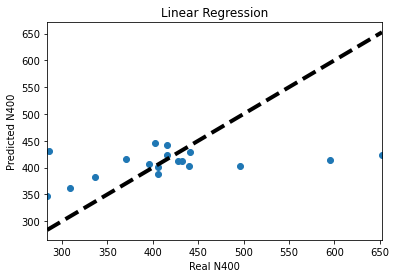

0.13405085617853207


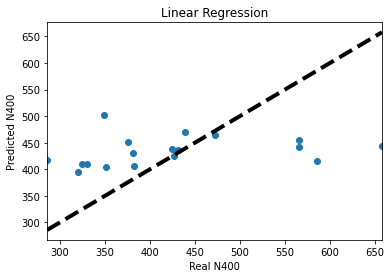

0.07092146544077027


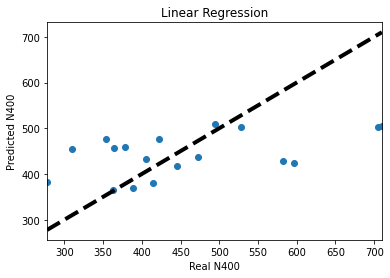

0.22531797015918642


In [59]:

#multivariate linear regression for each condition (3indep variables one dep)
X = []
y = []
Xaux = []
for condition in ['control', 'script-related', 'script-unrelated']:
    X=[]
    y = []
    for i,subject in zip(range(0, len(ERPS)), ERPS):
        if subject[1] == condition:
            for el in relevant_els[condition]:
                aux = (ERPS[subject][0][el], ERPS[subject][1][el])
                Xaux.append(aux)
            #X.append([(ERPS[subject][0]['T8'], ERPS[subject][1]['T8']), (ERPS[subject][0]['P7'], ERPS[subject][1]['P7']), (ERPS[subject][0]['PO9'], ERPS[subject][1]['PO9'])])
            X.append(Xaux)
            y.append(spr_avgs[i][0])  
            Xaux = []

    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nsamples, nx, ny = X_train.shape
    X_train = X_train.reshape((nsamples,nx*ny))
    nsamples, nx, ny = X_test.shape
    X_test = X_test.reshape((nsamples,nx*ny))
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # plot
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.title('Linear Regression')
    plt.xlim([y_test.min(), y_test.max()])
    plt.xlabel('Real N400')
    plt.ylabel('Predicted N400')
    plt.show()

    r2 = r2_score(y_test, y_pred)
    print(r2)

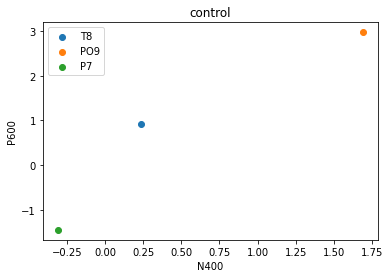

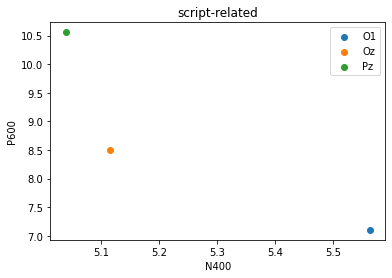

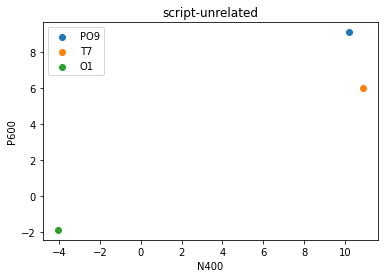

In [46]:
# visualise the difference between the mean and the predicted value

#plotting the ERPs for each condition
plt.figure()
for condition in ['control', 'script-related', 'script-unrelated']:
    for el in relevant_els[condition]:
        plt.scatter(ERPS[(1, condition)][0][el],ERPS[(1, condition)][1][el])
        plt.legend(relevant_els[condition])
        plt.xlabel('N400')
        plt.ylabel('P600')
    plt.title(condition)
    plt.show()



#IGNORE DOWN BELOW its the RNN of older strategy

In [ ]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cristian-ionescu202 (erp-group3). Use `wandb login --relogin` to force relogin


True

In [ ]:
X1 = np.array(X[:500]).reshape(500, 1, 1)
y1 = np.array(y[:500])

def get_model():
    inputs = layers.Input(shape=(1,1))
    lstm = layers.LSTM(2, activation="relu")(inputs)
    outputs = layers.Dense(2)(lstm)
    
    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='mse')

    return model

tf.keras.backend.clear_session()
model = get_model()
model.summary()

ValueError: cannot reshape array of size 4140 into shape (500,1,1)

In [ ]:
run = wandb.init(project="lstm-keras")

_ = model.fit(X1, y1, epochs=100, validation_split=0.2, batch_size=10, callbacks=[WandbMetricsLogger(log_freq=2)])

run.finish()

Epoch 1/100
40/40 [==============================] - 0s 6ms/step - loss: 107.3285 - val_loss: 101.7159
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 107.3284 - val_loss: 101.7149
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 107.3297 - val_loss: 101.7163
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 107.3257 - val_loss: 101.7120
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 107.3254 - val_loss: 101.7108
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 107.3244 - val_loss: 101.7116
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 107.3239 - val_loss: 101.7075
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 107.3241 - val_loss: 101.7086
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 107.3222 - val_loss: 101.7064
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss:

KeyboardInterrupt: 

In [ ]:
y[501], y[502], y[503]

([-7.959189207920791, -5.424932277227723],
 [4.3502447524752474, -2.3684133663366334],
 [4.408664158415842, 1.3072890099009904])

In [ ]:
test_input = np.array([X[501]])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input)
print(test_output)

1/1 [==============================] - 0s 29ms/step
[[ 0.30135134 -0.5533401 ]]


aux = subject_data[(1, 5, 'control')].loc[subject_data[(1, 5, 'control')]['Timestamp']<=500]
aux = aux.loc[aux['Timestamp']>=300]
n400 = aux.mean()

aux = subject_data[(1, 5, 'control')].loc[subject_data[(1, 5, 'control')]['Timestamp']<=1000]
aux = aux.loc[aux['Timestamp']>=600]
p600 = aux.mean()
p600

In [ ]:
#The P600 as a continuous index of integration effort